In [12]:
# Necessary Modules

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as mat

In [3]:
file=pd.read_csv('original.csv')
file.head(5)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
file.dtypes

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object

In [5]:
file=file.drop(columns=['clientid'])

In [6]:
file.dtypes

income     float64
age        float64
loan       float64
default      int64
dtype: object


Correlation with 'default':
default    1.000000
loan       0.377160
income     0.002284
age       -0.429759
Name: default, dtype: float64


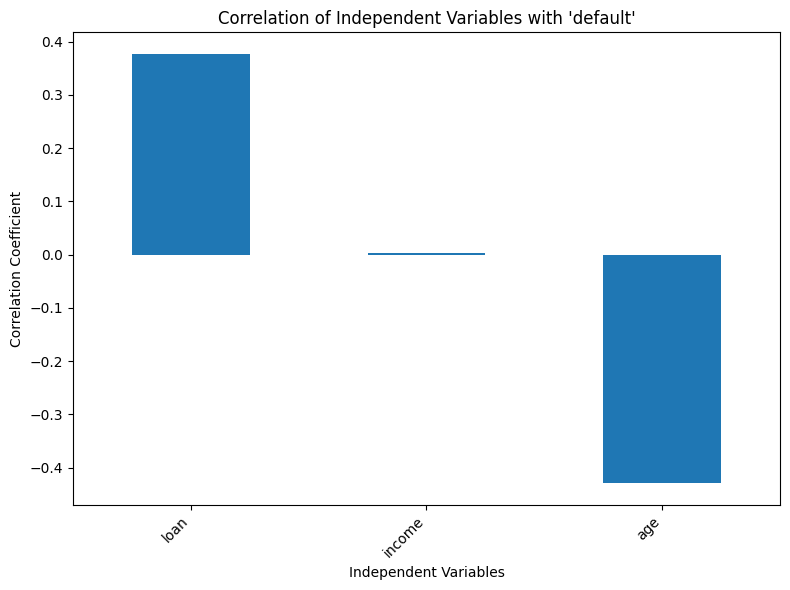

In [13]:
#correlation matrix

def check_default_correlation(df):
    correlation_matrix = df.corr()
    default_correlation = correlation_matrix['default'].sort_values(ascending=False)
    print("\nCorrelation with 'default':")
    print(default_correlation)
    mat.figure(figsize=(8, 6))
    default_correlation.drop('default').plot(kind='bar') # Drop 'Default' itself from the plot
    mat.title("Correlation of Independent Variables with 'default'")
    mat.ylabel("Correlation Coefficient")
    mat.xlabel("Independent Variables")
    mat.xticks(rotation=45, ha='right')
    mat.tight_layout()
    mat.show()

check_default_correlation(file)

<Axes: xlabel='default', ylabel='income'>

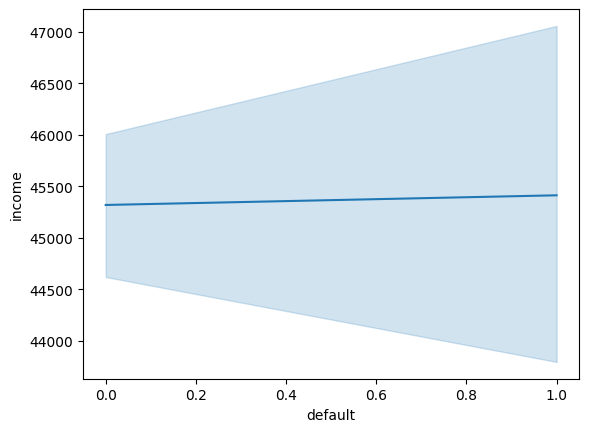

In [11]:
sb.lineplot(x=file.default,y=file.income)

<Axes: xlabel='default', ylabel='loan'>

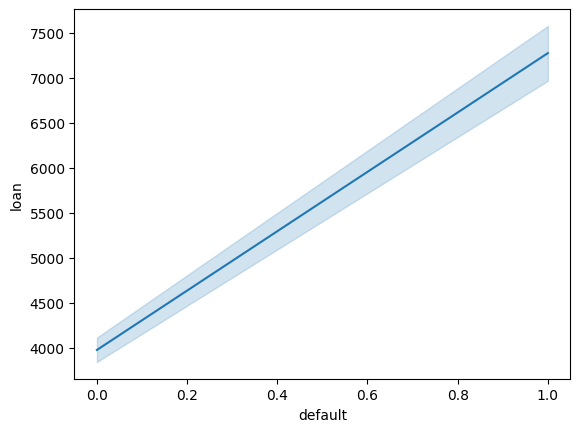

In [14]:
sb.lineplot(x=file.default,y=file.loan)

<Axes: xlabel='default', ylabel='age'>

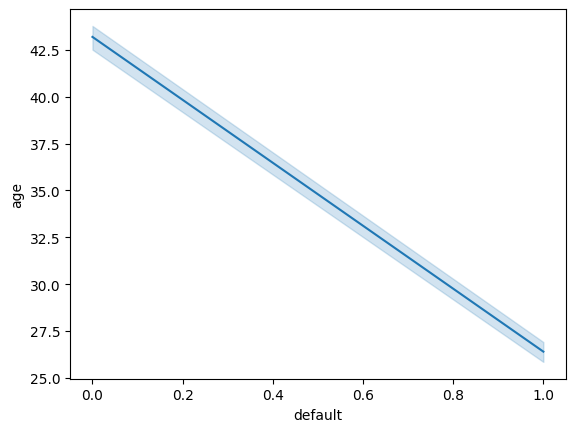

In [15]:
sb.lineplot(x=file.default,y=file.age)

In [24]:
X=file.drop(columns=['default'])
y=file.default

X_train,X_test,y_train,y_test=train_test_split(X.values,y.values)

In [25]:
file.describe()

,income,age,loan,default
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,45328.856915,40.927700,4443.240892,0.141926
std,14326.777212,13.271802,3046.879619,0.349062
min,20014.489470,18.055189,1.377630,0.000000
25%,32812.340050,29.043284,1934.218490,0.000000
50%,45785.950926,41.382673,3971.653442,0.000000
75%,57782.054534,52.616900,6438.044498,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


In [26]:
positive_age=file.age>=0
file=file[positive_age]

'''
positive_age_rows = file['age'] >= 0
file = file[positive_age_rows] '''

"\npositive_age_rows = file['age'] >= 0\nfile = file[positive_age_rows] "

In [27]:
file.describe()

,income,age,loan,default
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,45328.856915,40.927700,4443.240892,0.141926
std,14326.777212,13.271802,3046.879619,0.349062
min,20014.489470,18.055189,1.377630,0.000000
25%,32812.340050,29.043284,1934.218490,0.000000
50%,45785.950926,41.382673,3971.653442,0.000000
75%,57782.054534,52.616900,6438.044498,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


In [28]:
reg=LogisticRegression(random_state=42)
reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [29]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
sv=svm.LinearSVC(random_state=42)
sv.fit(X_train,y_train)

c:\Users\Acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [31]:
reg_pred=reg.predict(X_test)
rf_pred=rf.predict(X_test)
sv_pred=sv.predict(X_test)

In [36]:
print('logistic regression : '+str(accuracy_score(reg_pred,y_test)))
print('random forest classifier : '+str(accuracy_score(rf_pred,y_test)))
print('linear svc : '+str(accuracy_score(sv_pred,y_test)))

logistic regression : 0.9038076152304609
random forest classifier : 0.969939879759519
linear svc : 0.5130260521042084
